iris

**HERE WE ARE GOING TO READ AND PLOT SOME BASIC GRAPHS WHERE WE CAN LEARN THAT HOW THE ACTUALLY GRAPH IS PLOTTED AND HOW WE CAN GET OUTPUT IN FORM OF GRAPH FROM RAW DATA**

In [3]:
#importing neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [4]:
data = pd.read_csv('iris.csv')
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
#checking that whether our data is successfully loaded or not
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [7]:
data.isnull()  

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [8]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
data.isnull().head() #confirming for the null values

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


In [10]:
print(data.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


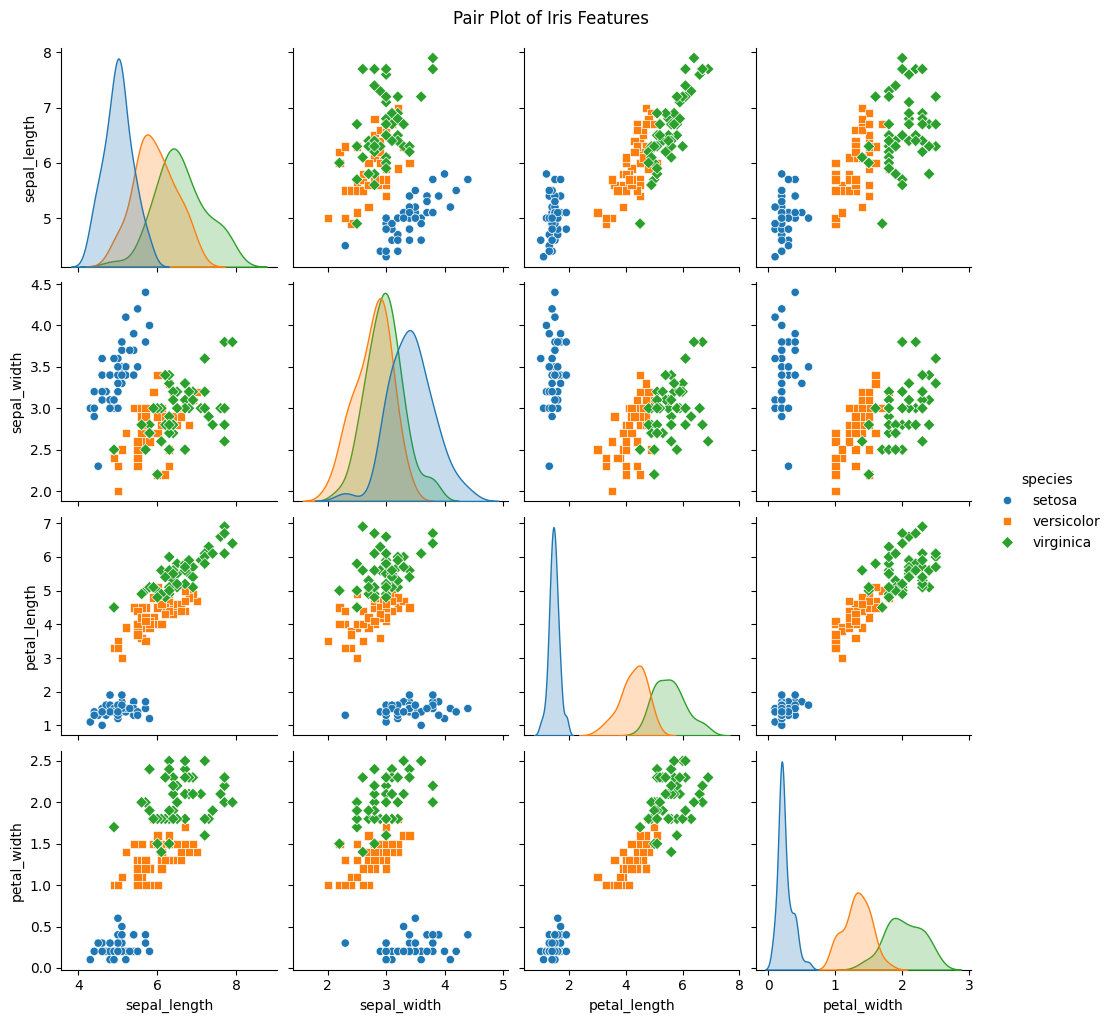

In [11]:
#1. Pair Plot of Features
sns.pairplot(data, hue='species', markers=["o", "s", "D"])
plt.suptitle("Pair Plot of Iris Features", y=1.02)
plt.show()


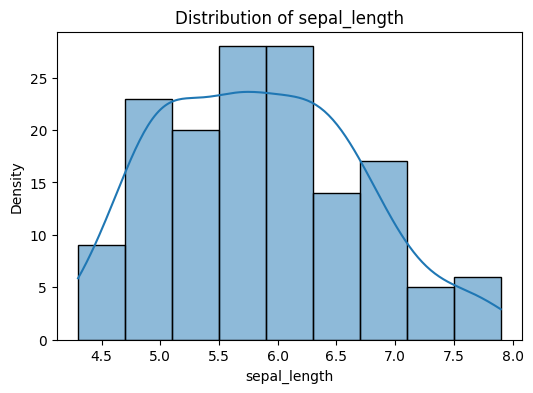

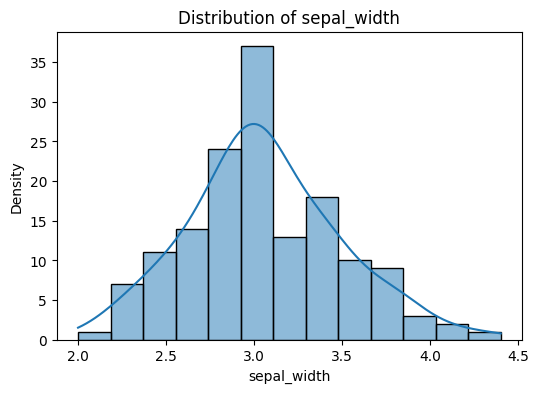

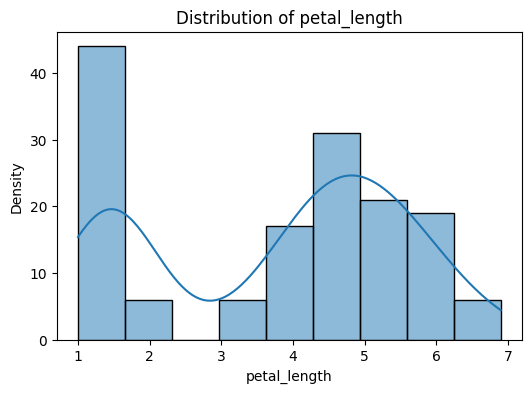

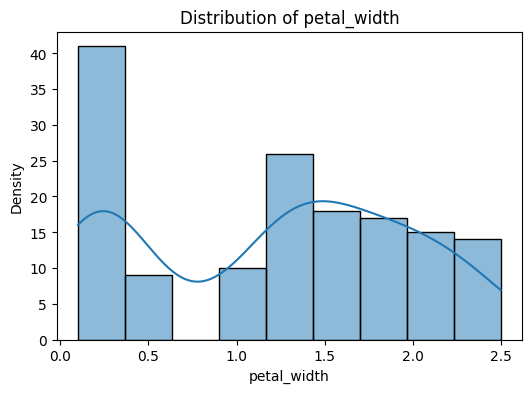

In [12]:
# 2. Distribution of Each Feature
features = data.columns[:-1]  # Exclude the 'species' column
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()


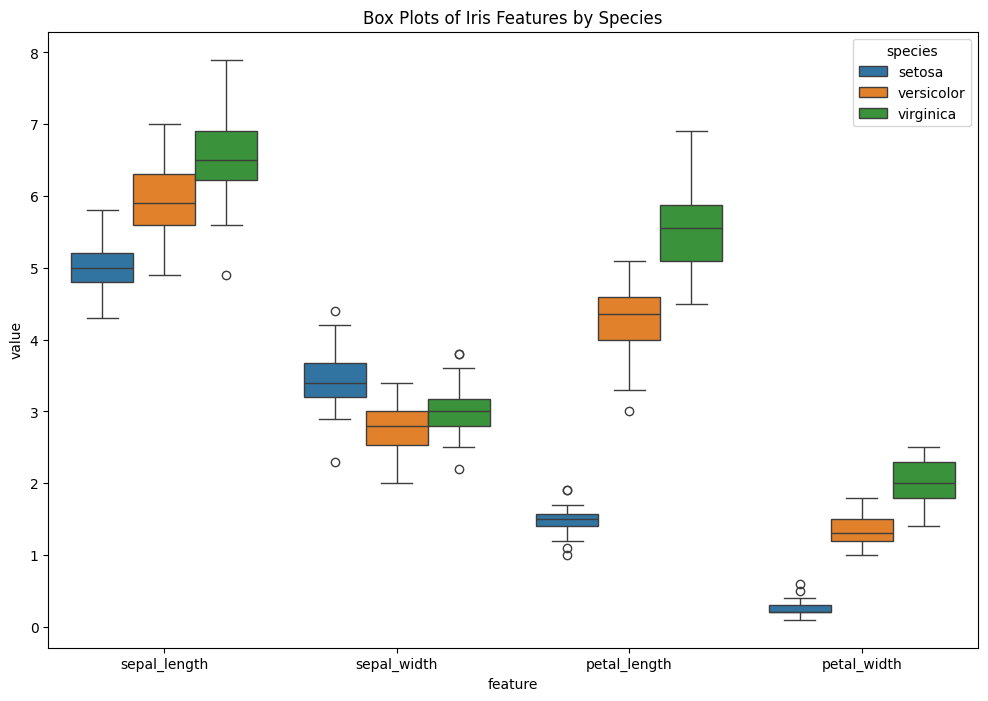

In [13]:
# 4. Box Plots for Each Feature
plt.figure(figsize=(12, 8))
data_melted = data.melt(id_vars="species", var_name="feature", value_name="value")
sns.boxplot(x='feature', y='value', hue='species', data=data_melted)
plt.title('Box Plots of Iris Features by Species')
plt.show()


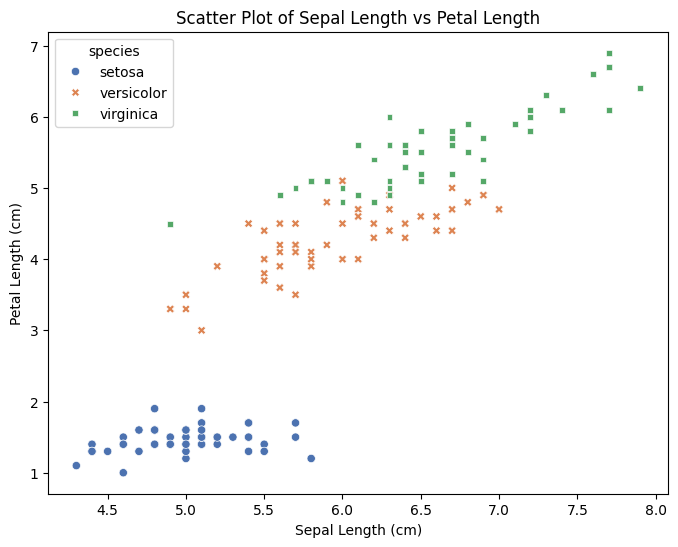

In [14]:
# 5. Scatter Plot Colored by Species
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['sepal_length'], y=data['petal_length'], hue=data['species'], style=data['species'], palette='deep')
plt.title('Scatter Plot of Sepal Length vs Petal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.show()

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
X = data[['sepal_length', 'petal_length']]
y = data['species']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model (using Logistic Regression)
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Optionally, you can also train a Decision Tree classifier
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

# Evaluate the Decision Tree model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Accuracy of Decision Tree: {accuracy_tree:.2f}")
print("Classification Report (Decision Tree):")
print(classification_report(y_test, y_pred_tree))

# Function to predict species based on new input
def predict_species(sepal_length, petal_length, model=model):
    input_data = np.array([[sepal_length, petal_length]])
    input_data_scaled = scaler.transform(input_data)
    prediction = model.predict(input_data_scaled)
    return prediction[0]

# Example usage:
print("Predicted species:", predict_species(5.1, 3.5))

Accuracy of Logistic Regression: 1.00
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Accuracy of Decision Tree: 0.96
Classification Report (Decision Tree):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.87      1.00      0.93        13
   virginica       1.00      0.85      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

Predicted species: versicolor


C:\Users\singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
